In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
# users = pd.read_csv('data/users.csv')
flights = pd.read_csv('data/flights.csv')
# hotels = pd.read_csv('data/hotels.csv')

In [3]:
flights.shape 

(271888, 10)

In [4]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


The first objective of this project is to build a ML model that can predict the price of the flight using flights.csv data.

Inspecting the dataset : flights.csv in depth

In [5]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   travelCode  271888 non-null  int64  
 1   userCode    271888 non-null  int64  
 2   from        271888 non-null  object 
 3   to          271888 non-null  object 
 4   flightType  271888 non-null  object 
 5   price       271888 non-null  float64
 6   time        271888 non-null  float64
 7   distance    271888 non-null  float64
 8   agency      271888 non-null  object 
 9   date        271888 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 20.7+ MB


We have 2,71,888 records and 10 columns in the dataset.There are no missing values in any of the columns.

In [6]:
# pd.set_option('display.max_rows', None)
# pd.reset_option('display.max_rows')

In [7]:
# Inspecting the travelCode column

flights['travelCode'].value_counts()

travelCode
0         2
90624     2
90638     2
90637     2
90636     2
         ..
45309     2
45308     2
45307     2
45306     2
135943    2
Name: count, Length: 135944, dtype: int64

In [8]:
flights['travelCode'].value_counts().unique()

array([2], dtype=int64)

In [9]:
# Inspecting a single travel code : 90638     

flights[flights['travelCode']==90638 ]

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
181276,90638,896,Florianopolis (SC),Natal (RN),firstClass,1385.49,1.84,709.37,Rainbow,07/02/2020
181277,90638,896,Natal (RN),Florianopolis (SC),firstClass,1554.92,1.84,709.37,Rainbow,07/03/2020


There are 135994 unique travelCodes in the dataset.And each of the travel code has two records associated with it(one for each direction of the journey).

A travelCode = one complete travel journey made by a user.A unique travel code is associated with a single user journey.


In [10]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [11]:
# Inspecting userCode column 

flights['userCode'].value_counts()

userCode
571     400
241     400
422     400
1089    400
322     400
       ... 
910       2
406       2
1016      2
647       2
361       2
Name: count, Length: 1335, dtype: int64

Total Number of unique users in the dataset : 1335


In [12]:
# All unique flight journey counts from every unique user.
flights['userCode'].value_counts().unique()

array([400, 398, 396, 394, 392, 390, 388, 386, 384, 382, 380, 378, 376,
       374, 372, 370, 368, 366, 364, 362, 360, 358, 356, 354, 352, 350,
       348, 346, 344, 342, 340, 338, 336, 334, 332, 330, 328, 326, 324,
       322, 320, 318, 316, 314, 312, 310, 308, 306, 304, 302, 300, 298,
       296, 294, 292, 290, 288, 286, 284, 282, 280, 278, 276, 274, 272,
       270, 268, 266, 264, 262, 260, 258, 256, 254, 252, 250, 248, 246,
       244, 242, 240, 238, 236, 234, 232, 230, 228, 226, 224, 222, 220,
       218, 216, 214, 212, 210, 208, 206, 204, 202, 200, 198, 196, 194,
       192, 190, 188, 186, 184, 182, 180, 178, 176, 174, 172, 170, 168,
       166, 164, 162, 160, 158, 156, 154, 152, 150, 148, 146, 144, 142,
       140, 138, 136, 134, 132, 130, 128, 126, 124, 122, 120, 118, 116,
       114, 112, 110, 108, 106, 104, 102, 100,  98,  96,  94,  92,  90,
        88,  86,  84,  82,  80,  78,  76,  74,  72,  70,  68,  66,  64,
        62,  60,  58,  56,  54,  52,  50,  48,  46,  44,  42,  4

This shows that some users have made multiple travel journeys in the dataset.While some users have made less number of travel journeys in the dataset.
The user with 400 travel journeys tells that this user is a frequent traveler.He has 200 travelCodes associated with him in the dataset.

One such user is userCode : 571 
Lets inspect all the travel journeys made by this user.

In [13]:
flights[flights['userCode']==571]

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
116920,58460,571,Campo Grande (MS),Natal (RN),economic,411.05,0.65,250.68,Rainbow,09/26/2019
116921,58460,571,Natal (RN),Campo Grande (MS),economic,470.16,0.65,250.68,Rainbow,09/28/2019
116922,58461,571,Campo Grande (MS),Florianopolis (SC),firstClass,1310.32,1.49,573.81,FlyingDrops,10/03/2019
116923,58461,571,Florianopolis (SC),Campo Grande (MS),firstClass,930.34,1.49,573.81,FlyingDrops,10/04/2019
116924,58462,571,Campo Grande (MS),Aracaju (SE),economic,877.56,1.69,650.10,Rainbow,10/10/2019
...,...,...,...,...,...,...,...,...,...,...
117315,58657,571,Rio de Janeiro (RJ),Campo Grande (MS),premium,1139.93,2.09,806.48,CloudFy,07/09/2023
117316,58658,571,Campo Grande (MS),Aracaju (SE),economic,886.90,1.69,650.10,CloudFy,07/13/2023
117317,58658,571,Aracaju (SE),Campo Grande (MS),economic,750.92,1.69,650.10,CloudFy,07/15/2023
117318,58659,571,Campo Grande (MS),Recife (PE),premium,959.91,1.39,535.40,CloudFy,07/20/2023


In [14]:
# travel codes associated with userCode 571
flights[flights['userCode']==571 ]['travelCode'].value_counts().keys()

Index([58460, 58597, 58587, 58588, 58589, 58590, 58591, 58592, 58593, 58594,
       ...
       58524, 58525, 58526, 58527, 58528, 58529, 58530, 58531, 58532, 58659],
      dtype='int64', name='travelCode', length=200)

Inspecting "from" column 

In [15]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,09/26/2019
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,09/30/2019
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,10/03/2019
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,10/04/2019
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,10/10/2019


In [16]:
flights['from'].value_counts()

from
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

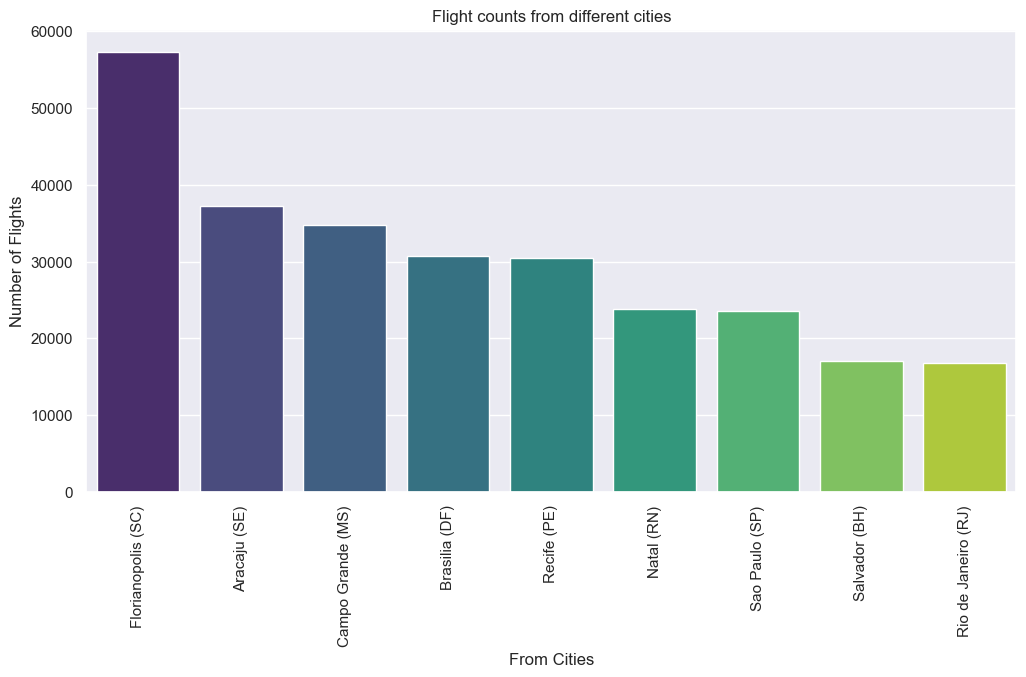

In [17]:
# bar plot for from value counts
plt.figure(figsize=(12,6))
sns.barplot(x=flights['from'].value_counts().index , y=flights['from'].value_counts().values , palette='viridis')
plt.xticks(rotation=90)
plt.title('Flight counts from different cities')
plt.xlabel('From Cities')
plt.ylabel('Number of Flights')
plt.show()

In [18]:
# Total number of unique cities from which flights are departing
len(flights['from'].value_counts())

9

In [19]:
# save this list for future use
import pickle
with open('./artifacts/from_cities_list.pkl', 'wb') as f:
    pickle.dump(flights['from'].value_counts().index.to_list(), f)

In [20]:
# Missing values check
flights.isnull().sum()

travelCode    0
userCode      0
from          0
to            0
flightType    0
price         0
time          0
distance      0
agency        0
date          0
dtype: int64

No missing values in the dataset : flights 

In [21]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [22]:
# inspecting 'to' column
flights['to'].value_counts()

to
Florianopolis (SC)     57317
Aracaju (SE)           37224
Campo Grande (MS)      34748
Brasilia (DF)          30779
Recife (PE)            30480
Natal (RN)             23796
Sao Paulo (SP)         23625
Salvador (BH)          17104
Rio de Janeiro (RJ)    16815
Name: count, dtype: int64

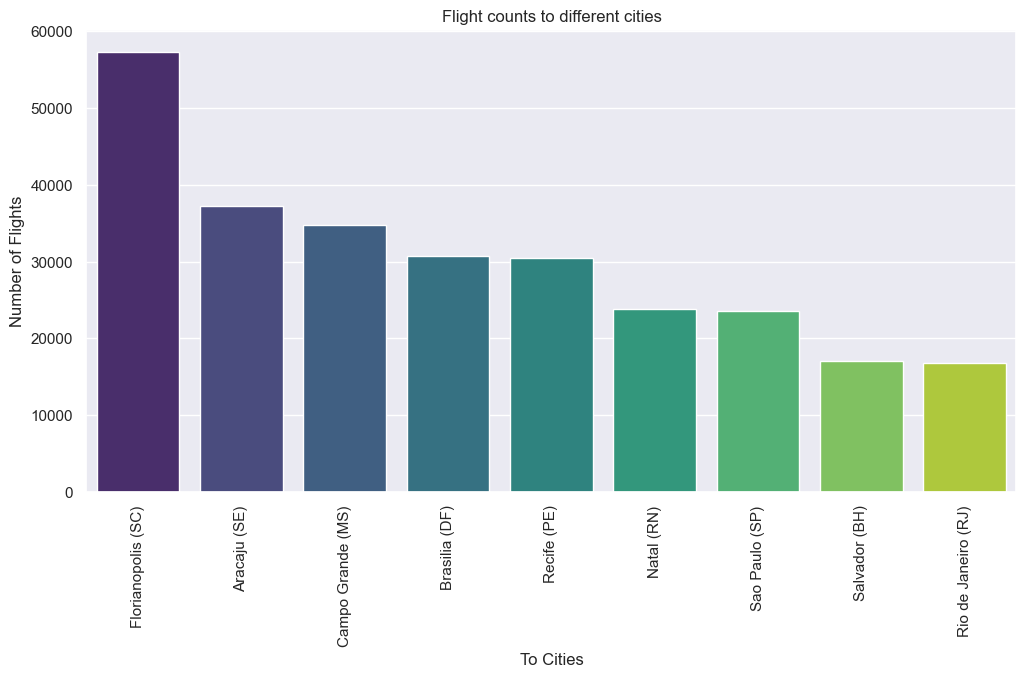

In [23]:
# bar plot for 'to' value counts
plt.figure(figsize=(12,6))
sns.barplot(x=flights['to'].value_counts().index , y=flights['to'].value_counts().values , palette='viridis')
plt.xticks(rotation=90)
plt.title('Flight counts to different cities')
plt.xlabel('To Cities')
plt.ylabel('Number of Flights')
plt.show()

In [24]:
flights['from'].value_counts().index.to_list() == flights['to'].value_counts().index.to_list()

True

Same unique cities in 'from' and 'to' columns

In [25]:
# Inspecting flight type column
flights['flightType'].value_counts()

flightType
firstClass    116418
premium        78004
economic       77466
Name: count, dtype: int64

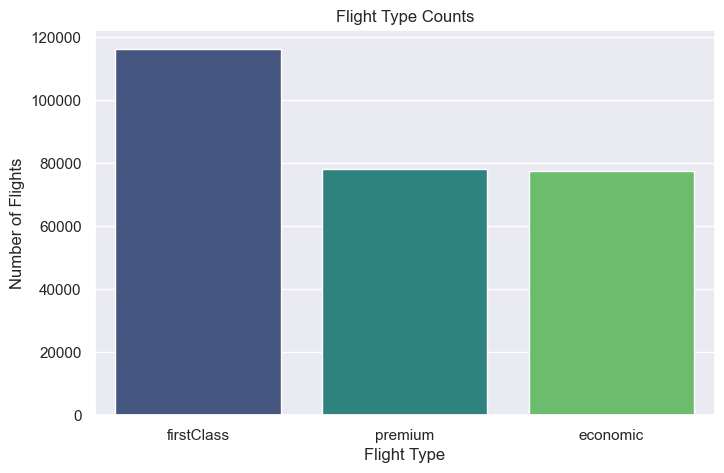

In [26]:
# create bar plot for flightType value counts
plt.figure(figsize=(8,5))
sns.barplot(x=flights['flightType'].value_counts().index , y=flights['flightType'].value_counts().values , palette='viridis')
plt.title('Flight Type Counts')
plt.xlabel('Flight Type')
plt.ylabel('Number of Flights')
plt.show()

Maximum flights are associated with Firstclass flight type , then premium and then economic

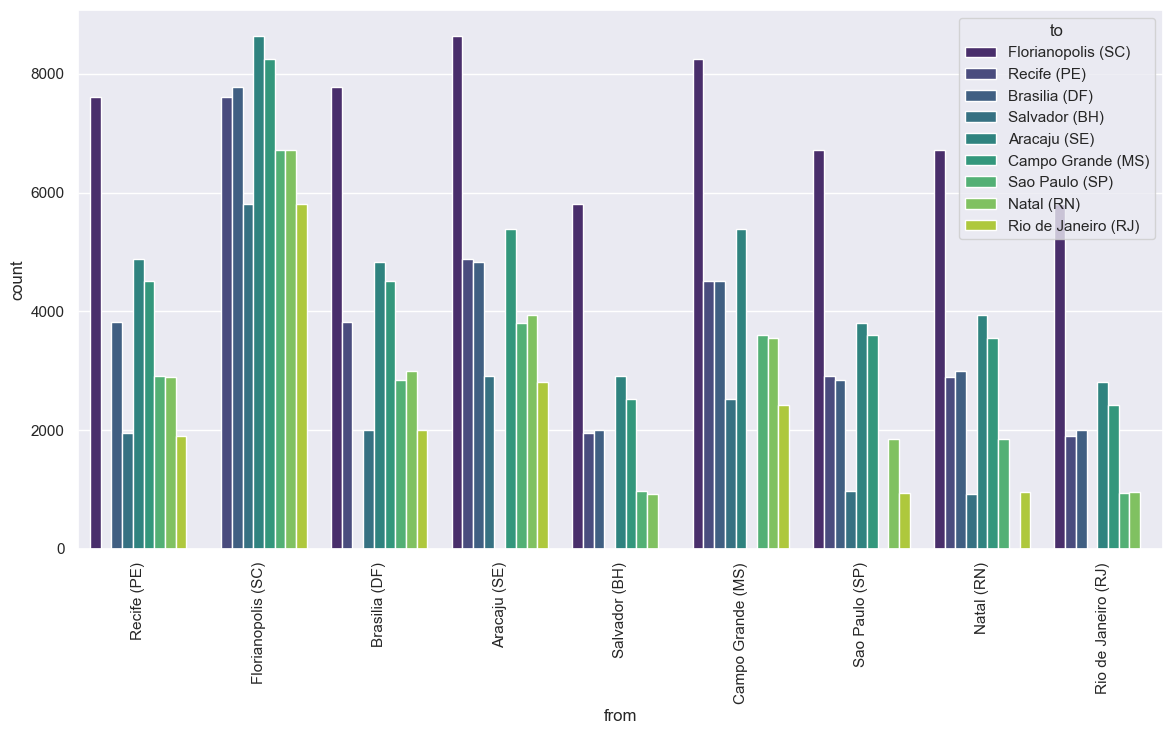

In [27]:
# Visualization between from and to cities
plt.figure(figsize=(14,7))
sns.countplot(data=flights, x='from', hue='to', palette='viridis')
plt.xticks(rotation=90)
plt.show()

we can see that majority of the flights from all the cities fly to Florianopolis.The flights from the Florianopolis city are majorly flying to cities : Aracaju and Campo Grande.However from Florianopolis noticeable most of the cities flights are comparably similar in value (in the range of 6000 to 8 000 flights).

Most Flights traffic is for Florianopolis city.

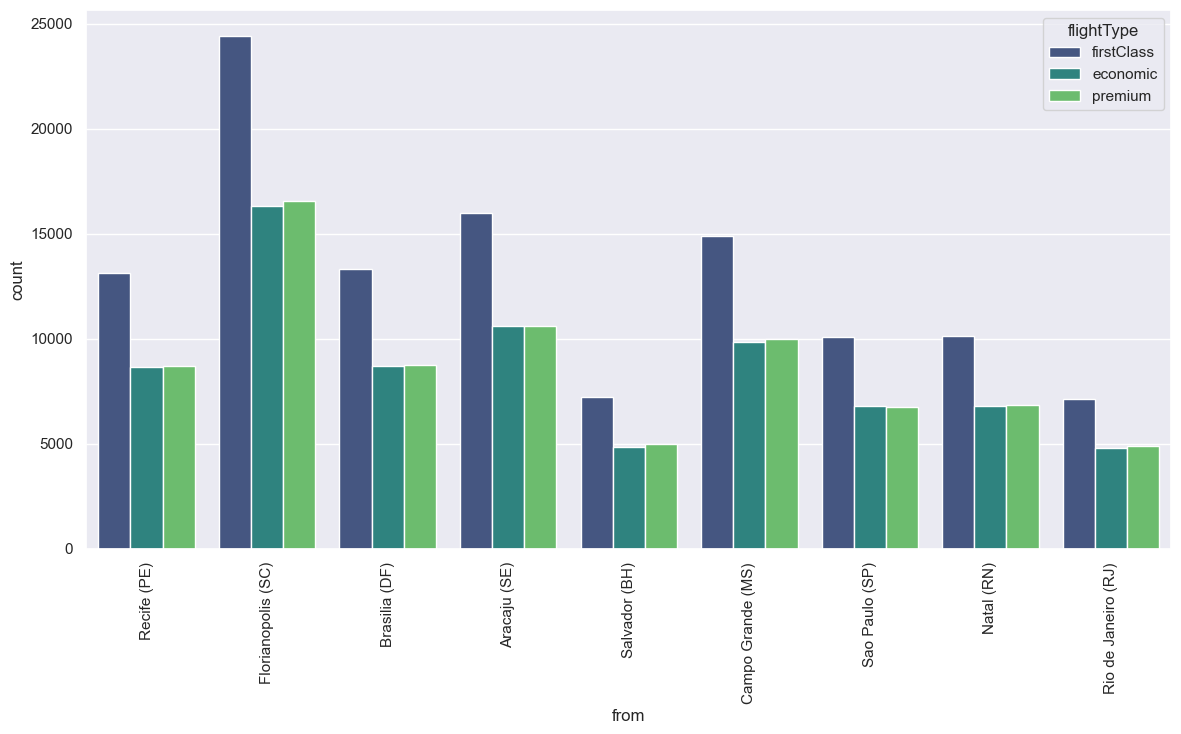

In [28]:
# Visualization for getting categorization of flightType with respect to "from" cities
plt.figure(figsize=(14,7))
sns.countplot(data=flights, x='from', hue='flightType', palette='viridis')
plt.xticks(rotation=90)
plt.show()

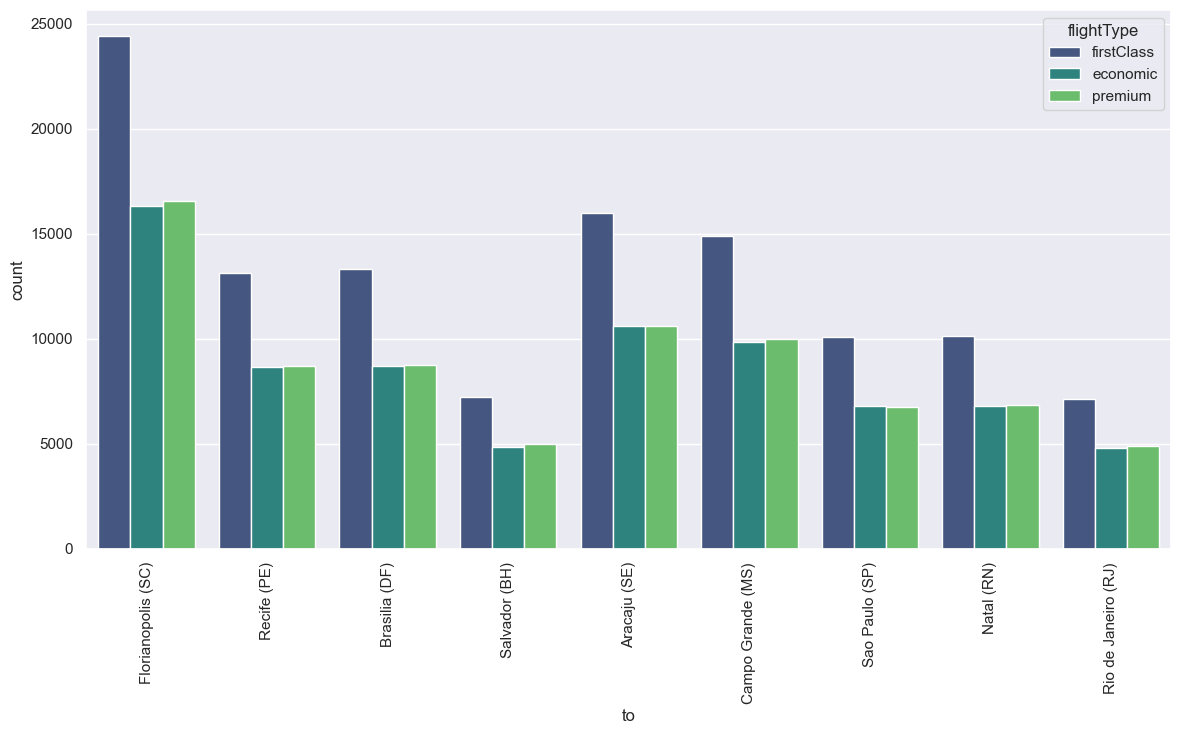

In [29]:
# Visualization for getting categorization of flightType with respect to "to" cities
plt.figure(figsize=(14,7))
sns.countplot(data=flights, x='to', hue='flightType', palette='viridis')
plt.xticks(rotation=90)
plt.show()

In [30]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

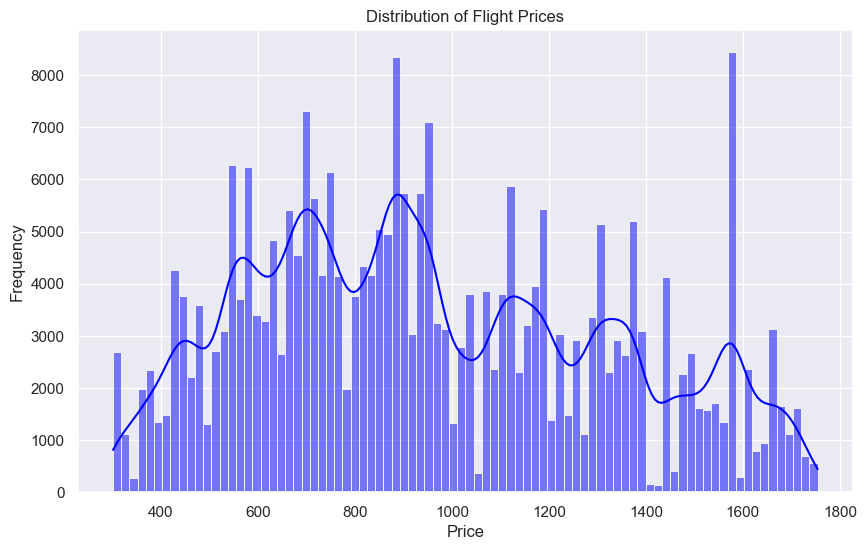

In [31]:
# Visualize the distribution of price column
plt.figure(figsize=(10,6))
sns.histplot(x = flights['price'], bins='auto', kde=True, color='blue')
plt.title('Distribution of Flight Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [32]:
flights['price'].mean() , flights['price'].median() , flights['price'].min() , flights['price'].max()

(957.3750299387983, 904.0, 301.51, 1754.17)

We can see that the range of flight prices overall (irrespective of flighttype and cities) is from 200 to 1700 dollars approximately. THe peak of the distribution seems to be around 900 dollars.However we can see the distribution shows multiple peaks in the distribution.It is a multimodal distribution.For all price ranges , we can see there is some peak present somewhere.

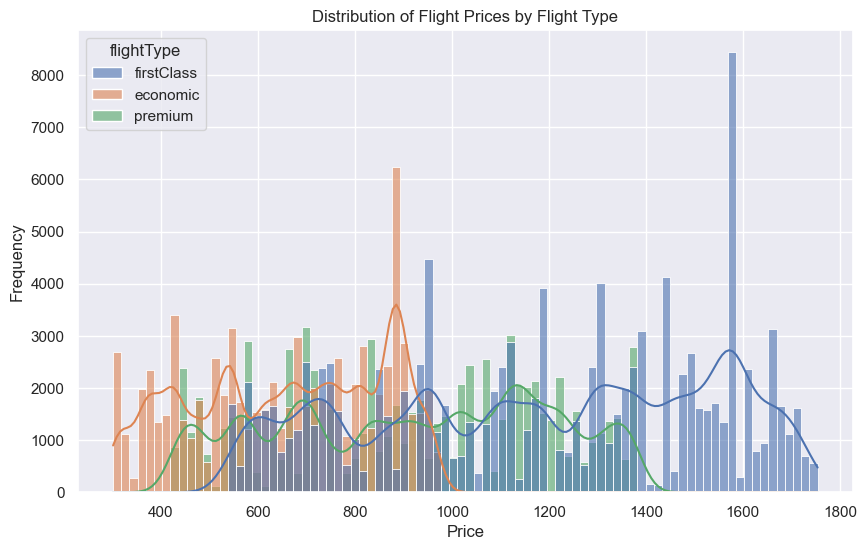

In [33]:
# Visualizing the distribution of prices for each flighttype.Make use of distinctive colors and transparency of colors for better clarity.
plt.figure(figsize=(10,6))
sns.histplot(data=flights, x='price', hue='flightType', bins='auto', kde=True, palette='deep', alpha=0.6)
plt.title('Distribution of Flight Prices by Flight Type')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

We can visualize the distribution of prices for each flighttype in this plot. we see that the economic flight type has the lowest price range, followed by premium and then firstclass having the highest price range. The peaks of the distributions for each flighttype are also different, with economic peaking at a lower price point compared to premium and firstclass. This indicates that flighttype has a significant impact on the pricing of flights.

The economic peak is around 900 dollars.The premium distribution has multiple peaks and the distribution seems more like uniform distribution.The firstclass distribution has peaks around 1600 dollars , also we can see multiple peaks in the distribution as well.

In [34]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [35]:
# Inspecting the time column

flights['time']

0         1.76
1         1.76
2         1.66
3         1.66
4         2.16
          ... 
271883    1.49
271884    1.84
271885    1.84
271886    1.21
271887    1.21
Name: time, Length: 271888, dtype: float64

In [36]:
flights['time'].mean() , flights['time'].median() , flights['time'].min() , flights['time'].max()

(1.4211474577767313, 1.46, 0.44, 2.44)

The mean flight time is 1.42 hours , median flight time is 1.46 hours , minimum flight time is 0.44 hours and maximum flight time is 2.44 hours.

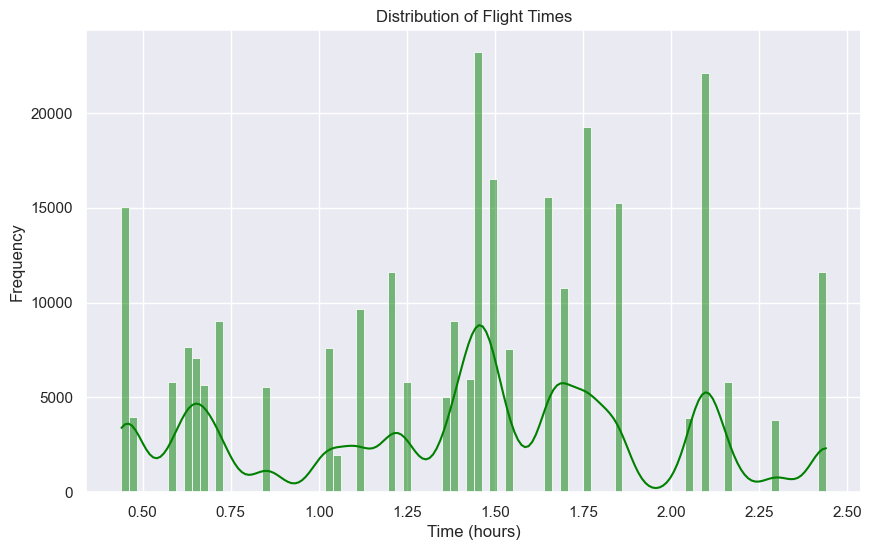

In [37]:
# Visualizing the distribution of time column
plt.figure(figsize=(10,6))
sns.histplot(x = flights['time'], bins='auto', kde=True, color='green')
plt.title('Distribution of Flight Times')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()  

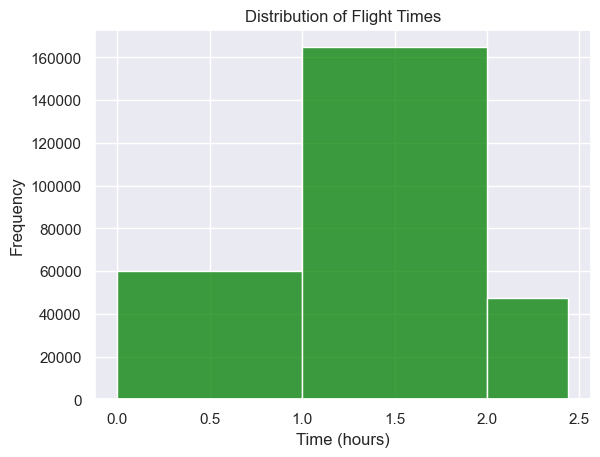

In [38]:
# Visualizing the distribution of time column
# plt.figure(figsize=(10,6))

bins = [0, 1, 2, flights['time'].max()]

sns.histplot(x = flights['time'], bins=bins, color='green')

plt.title('Distribution of Flight Times')
plt.xlabel('Time (hours)')
plt.ylabel('Frequency')
plt.show()


Most of the flights have flight time in range 1 hr to 2 hrs.

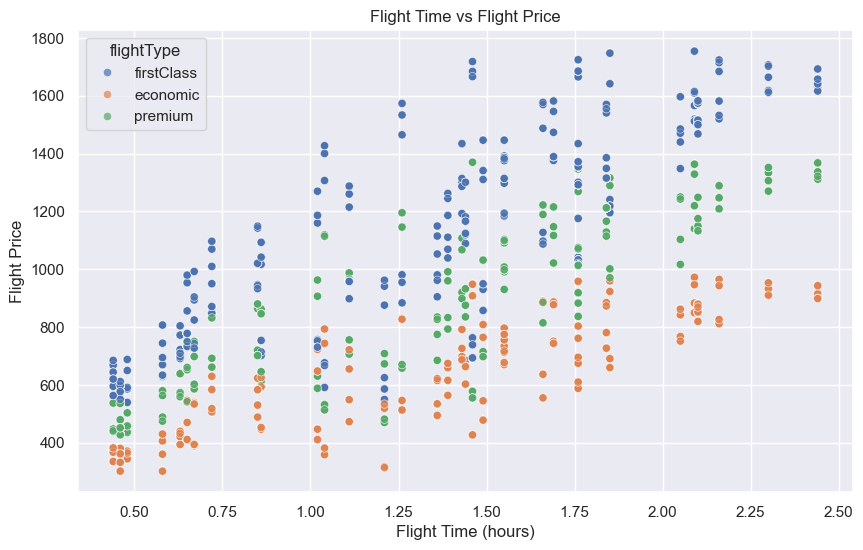

In [39]:
# Visulization showing the relationship between flight time and flight price . 
plt.figure(figsize=(10,6))
sns.scatterplot(data=flights, x='time', y='price', hue='flightType', palette='deep', alpha=0.7)
plt.title('Flight Time vs Flight Price')
plt.xlabel('Flight Time (hours)')
plt.ylabel('Flight Price')
plt.show()

The trend shows that as the flight time increases , the flight price also tends to increase.This is expected as longer flights generally require more fuel and resources, leading to higher costs that are passed on to passengers. Additionally, longer flights may also offer more amenities and services, which can also contribute to higher prices.

There are some outliers present in the dataset. We can see that some flights of premium type are having comparably lower prices that are similar to economic flight prices and some outlier premium flights are having prices similar to firstclass flight prices.This can be attributed to various factors such as discounts, promotions, or special offers that airlines may provide for certain flights. Additionally, some premium flights may have different levels of service or amenities, which can also affect the pricing. Also , seasonal demand and competition among airlines can also lead to fluctuations in flight prices, resulting in outliers in the dataset.

In [40]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date'],
      dtype='object')

In [41]:
# Inspecting the distance column

flights['distance']

0         676.53
1         676.53
2         637.56
3         637.56
4         830.86
           ...  
271883    573.81
271884    709.37
271885    709.37
271886    466.30
271887    466.30
Name: distance, Length: 271888, dtype: float64

In [42]:
flights['distance'].mean() , flights['distance'].median() , flights['distance'].min() , flights['distance'].max()

(546.955535441064, 562.14, 168.22, 937.77)

Minimum flight distance is 168.22 kms , maximum is 937 kms and mean is 546.95 kms

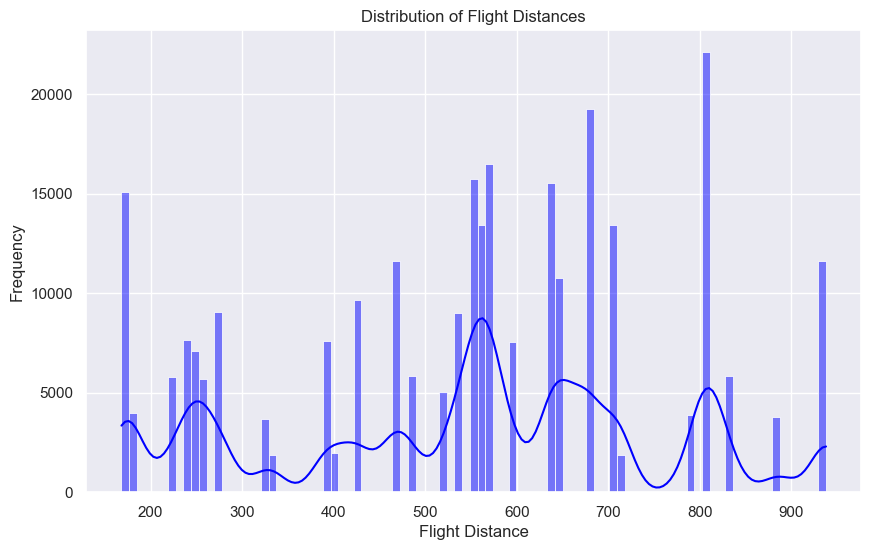

In [43]:
# Plot the distance column distribution

plt.figure(figsize=(10,6))
sns.histplot(x = flights['distance'], bins='auto', kde=True, color='blue')
plt.title('Distribution of Flight Distances')
plt.xlabel('Flight Distance')
plt.ylabel('Frequency')
plt.show()

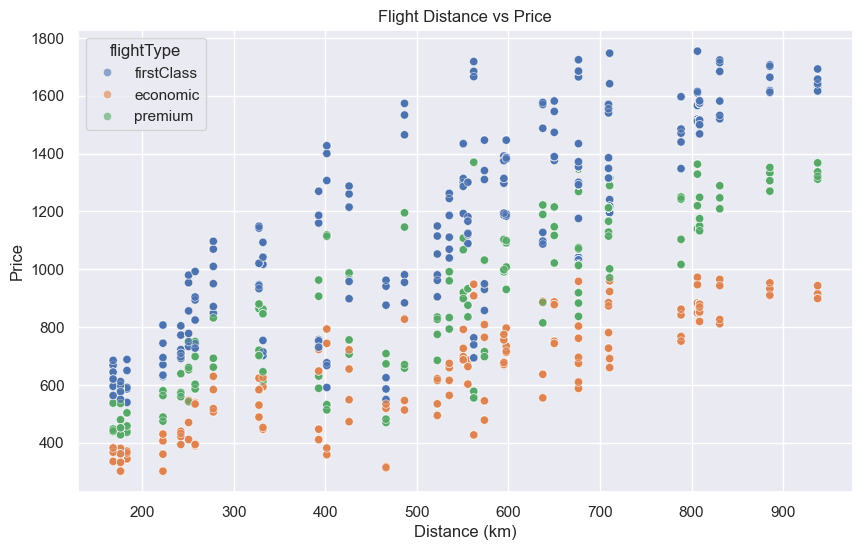

In [44]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = flights , x = 'distance' , y = 'price' , hue = 'flightType' , alpha = 0.6)
plt.title("Flight Distance vs Price")
plt.xlabel("Distance (km)")
plt.ylabel("Price")
plt.show()

Flight price increases with increase in flight distance for all flightType categories.

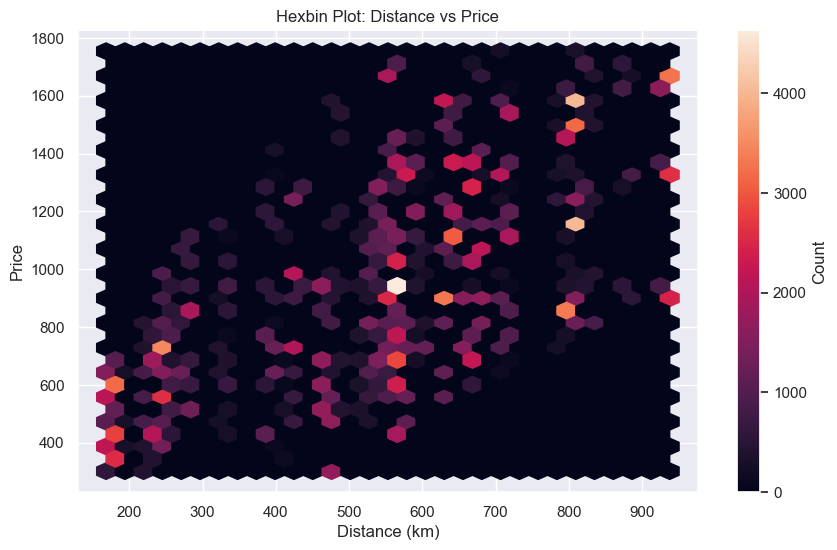

In [45]:
plt.figure(figsize=(10,6))
plt.hexbin(flights['distance'], flights['price'], gridsize=30)
plt.colorbar(label='Count')
plt.xlabel('Distance (km)')
plt.ylabel('Price')
plt.title('Hexbin Plot: Distance vs Price')
plt.show()


Bright red spots shows higher concentration of data points. The plot shows same trend lower flight distance : lower prices and higher flight distance higher prices.

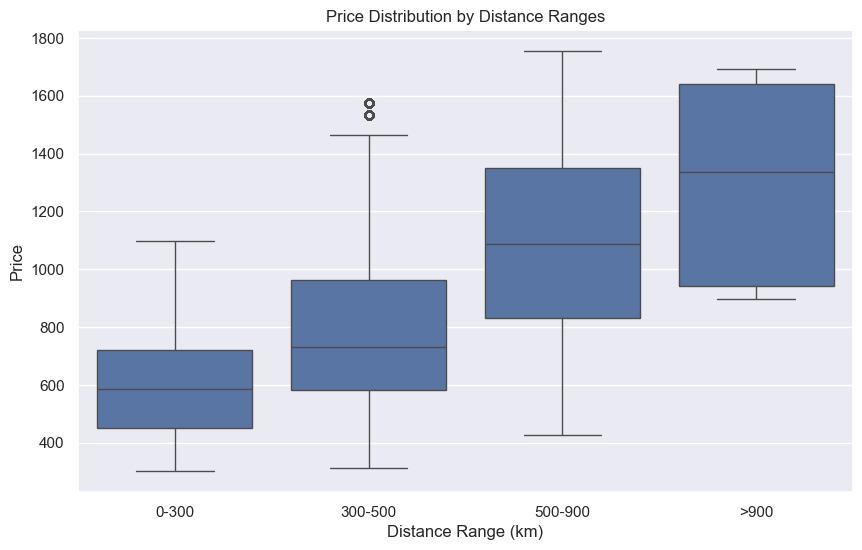

In [46]:
# create distance bins
flights['distance_bin'] = pd.cut(flights['distance'], bins=[0,300,500,900,1000], 
                                 labels=['0-300','300-500','500-900','>900'])

plt.figure(figsize=(10,6))
sns.boxplot(data=flights, x='distance_bin', y='price')
plt.title('Price Distribution by Distance Ranges')
plt.xlabel('Distance Range (km)')
plt.ylabel('Price')
plt.show()


Price overlapping can be seen across all distance bin categories. However we can see the increasing distance causing increasing prices . The mean price is increasing with flight distance

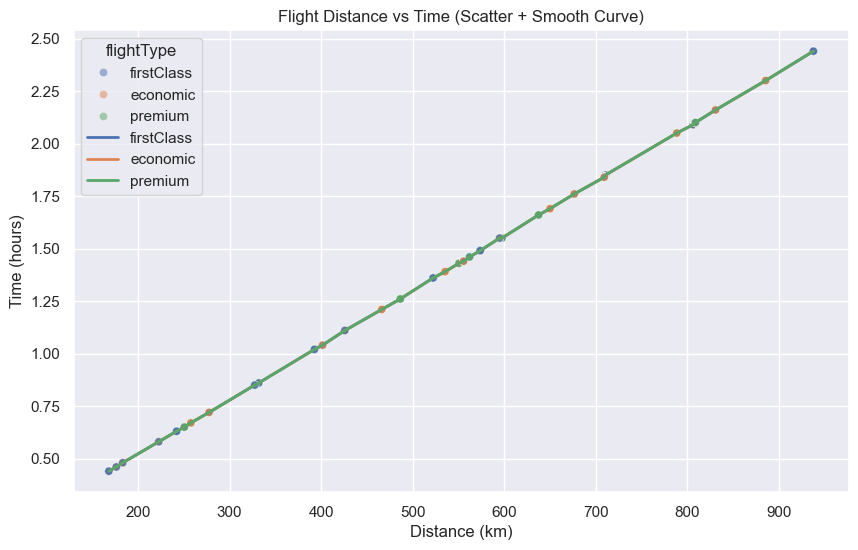

In [47]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=flights, x='distance', y='time', hue='flightType', alpha=0.5)
sns.lineplot(data=flights, x='distance', y='time', hue='flightType', estimator=None, lw=2)
plt.title('Flight Distance vs Time (Scatter + Smooth Curve)')
plt.xlabel('Distance (km)')
plt.ylabel('Time (hours)')
plt.show()


THis shows that the flight time taken to cover the distance is irrespective of the flightType. This shows all flightType are flying at nearly equal speeds.

In [48]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin'],
      dtype='object')

In [49]:
# inspecting agency column

flights['agency'].unique()

array(['FlyingDrops', 'CloudFy', 'Rainbow'], dtype=object)

There are 3 flight agencies providing the flight services

In [50]:
flights['agency'].value_counts()

agency
Rainbow        116752
CloudFy        116378
FlyingDrops     38758
Name: count, dtype: int64

Rainbow and cloudFy agency are strong competitors of each other.They capture most of the flight traffic with nearly equal number of flights hosted be each of them.

FlyingDrops agency is a relatively smaller agency in terms of its flights hosting and customer base. It has 38000+ flights associated with it.

In [51]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin'],
      dtype='object')

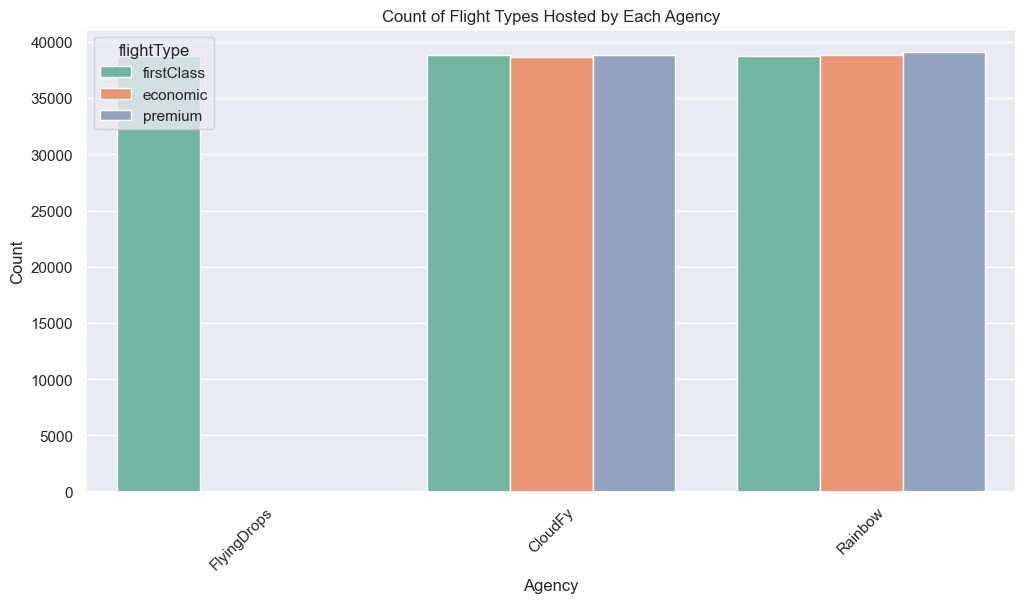

In [52]:
# Visualizing the count of each flightType hosted by each agency
plt.figure(figsize=(12,6))
sns.countplot(data=flights, x='agency', hue='flightType', palette='Set2')
plt.title('Count of Flight Types Hosted by Each Agency')
plt.xlabel('Agency')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


It shows FlyingDrops only caters firstClass FlightType to the passengers.It do not provide other flightTypes : economic and premium.
The major traffic of passenger is with CloudFy and Rainbow agencies which provides economic and premium flightType as well. The flight traffic for each of these two airlines is nearly thrice of the passenger traffic with FlyingDrops.

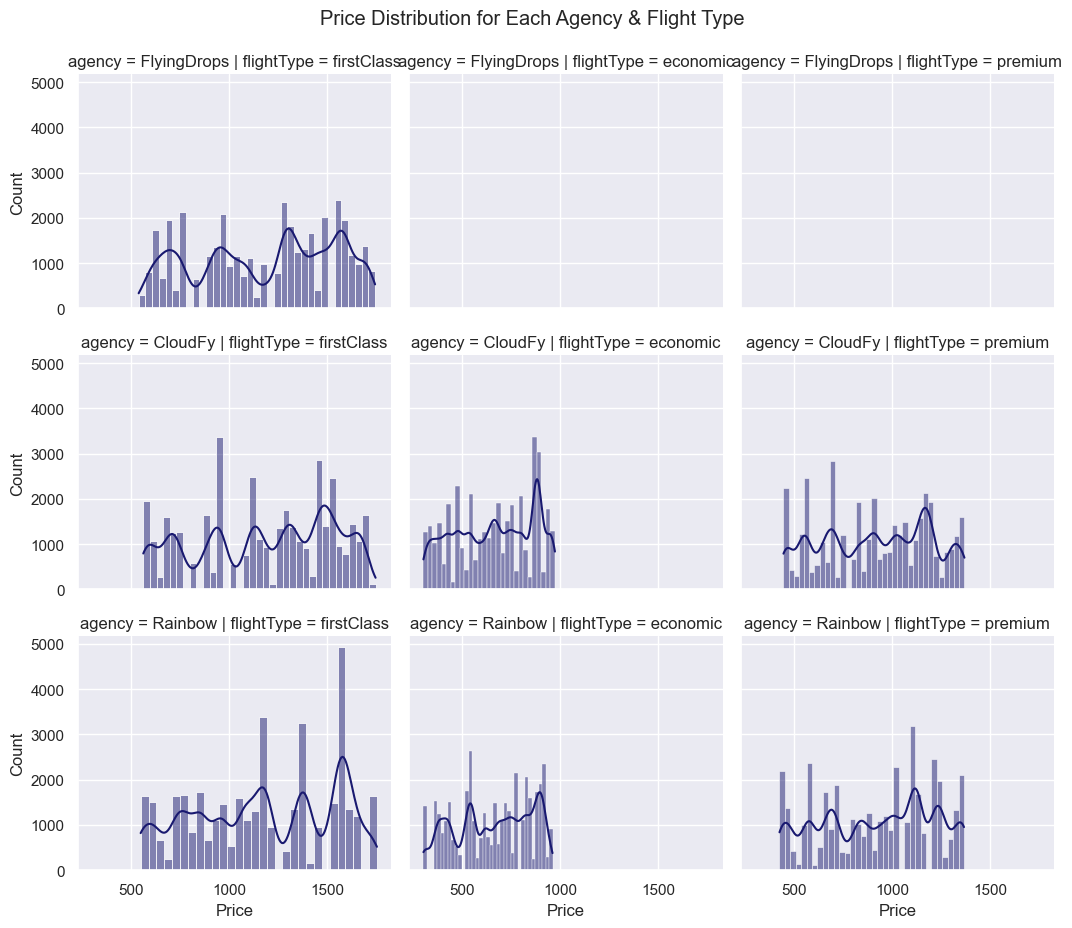

In [53]:
# Price distribution for every Agency × Flight Type

g = sns.FacetGrid(flights, row='agency', col='flightType', height=3, aspect=1.2)
g.map_dataframe(sns.histplot, x='price', kde=True, color='midnightblue')
g.set_axis_labels("Price", "Count")
g.fig.suptitle("Price Distribution for Each Agency & Flight Type", y=1.03)
plt.show()


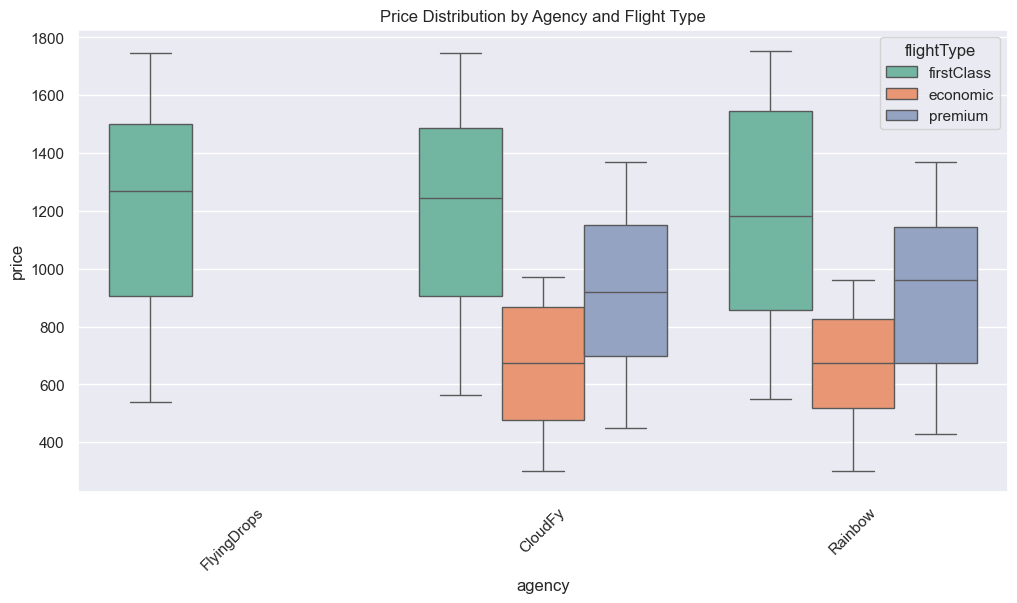

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(data=flights, x='agency', y='price', hue='flightType', palette='Set2')
plt.title("Price Distribution by Agency and Flight Type")
plt.xticks(rotation=45)
plt.show()


In [55]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin'],
      dtype='object')

In [56]:
# Info of flights

flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271888 entries, 0 to 271887
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   travelCode    271888 non-null  int64   
 1   userCode      271888 non-null  int64   
 2   from          271888 non-null  object  
 3   to            271888 non-null  object  
 4   flightType    271888 non-null  object  
 5   price         271888 non-null  float64 
 6   time          271888 non-null  float64 
 7   distance      271888 non-null  float64 
 8   agency        271888 non-null  object  
 9   date          271888 non-null  object  
 10  distance_bin  271888 non-null  category
dtypes: category(1), float64(3), int64(2), object(5)
memory usage: 21.0+ MB


In [57]:
# Analysis of date column  

flights['date']

0         09/26/2019
1         09/30/2019
2         10/03/2019
3         10/04/2019
4         10/10/2019
             ...    
271883    07/12/2020
271884    07/16/2020
271885    07/20/2020
271886    07/23/2020
271887    07/26/2020
Name: date, Length: 271888, dtype: object

The dtype is object for date . It needs to be converted to datetime dtype.

In [58]:
flights['date'] = pd.to_datetime(flights['date'])

In [59]:
flights['date'].min() , flights['date'].max()

(Timestamp('2019-09-26 00:00:00'), Timestamp('2023-07-24 00:00:00'))

The earliest date is 26th of september 2019 and the latest date is 24th of July 2023.THis is the timeperiod of the records of the flights in the dataset.

In [60]:
# creating some date columns for analysis 

flights['year'] = flights['date'].dt.year
flights['month'] = flights['date'].dt.month
flights['day'] = flights['date'].dt.day
flights['weekday'] = flights['date'].dt.day_name()


In [61]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,distance_bin,year,month,day,weekday
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,500-900,2019,9,26,Thursday
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,500-900,2019,9,30,Monday
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,500-900,2019,10,3,Thursday
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,500-900,2019,10,4,Friday
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,500-900,2019,10,10,Thursday


In [62]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

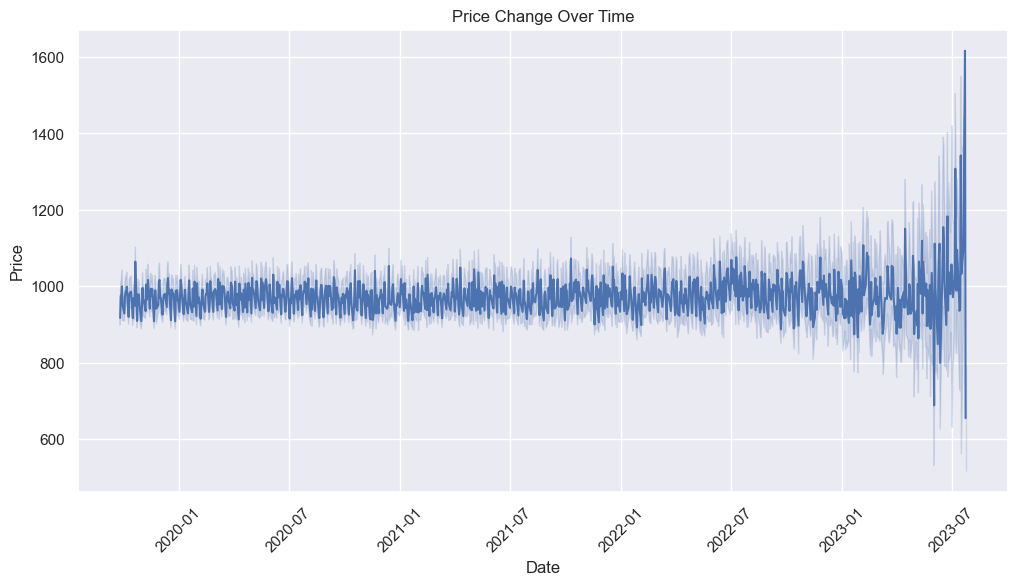

In [63]:
# (Price vs Date) : Prices trend over time
plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x='date', y='price')
plt.title('Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


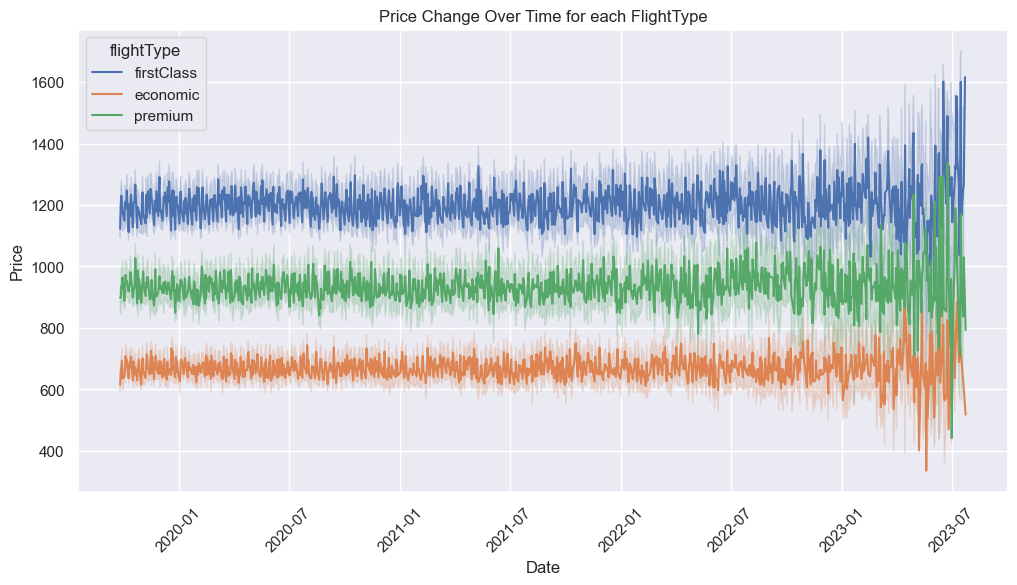

In [64]:
# Price Trend with flightType 

plt.figure(figsize=(12,6))
sns.lineplot(data=flights, x='date', y='price' , hue = 'flightType')
plt.title('Price Change Over Time for each FlightType')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


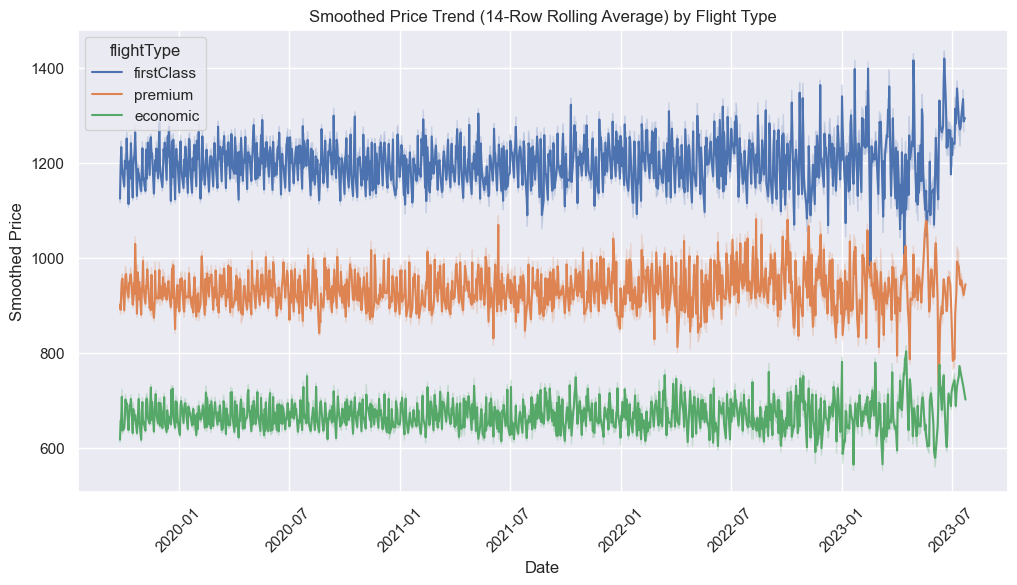

In [65]:
# create a NEW sorted dataframe
flights_ordered = flights.sort_values('date').reset_index(drop=True)
# 7-row rolling mean within each flightType
flights_ordered['rolling_price'] = (
    flights_ordered
    .groupby('flightType')['price']
    .apply(lambda s: s.rolling(window=14, min_periods=1).mean())
    .reset_index(level=0, drop=True)
)

plt.figure(figsize=(12,6))
sns.lineplot(data=flights_ordered, x='date', y='rolling_price', hue='flightType')
plt.title('Smoothed Price Trend (14-Row Rolling Average) by Flight Type')
plt.xlabel('Date')
plt.ylabel('Smoothed Price')
plt.xticks(rotation=45)
plt.show()


Flight prices seems to be jittery in the entire timeline for each of the flightType.However we can see a slightly increasing trend in the prices of the firstClass FlightType in 2023 , Premium prices are seeming to be reducing .The economy prices are stabe in the entire timeline , but we can see slight increase in the 2023.

However the jitters in the entire timeline of each flight types suggests that the seasonality of the prices might be in some smaller time component . we will try to analyse that.

In [66]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin', 'year', 'month', 'day',
       'weekday'],
      dtype='object')

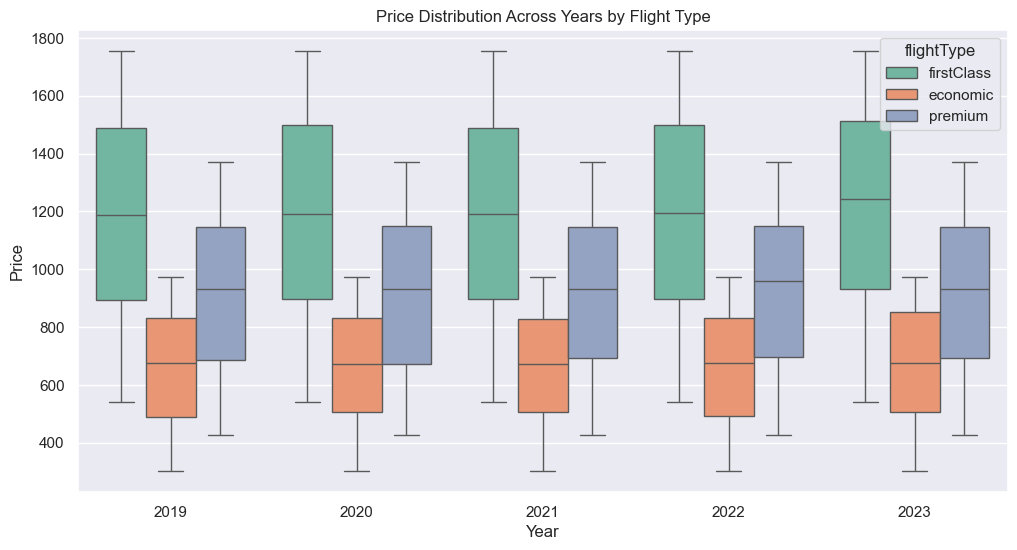

In [67]:
plt.figure(figsize=(12,6))
sns.boxplot(
    data=flights, 
    x='year', 
    y='price', 
    hue='flightType',
    palette='Set2'
)
plt.title('Price Distribution Across Years by Flight Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


The boxplot confirms that there is no major price changes happening across any flight Type with the changes in the years from 2019 to 2023.

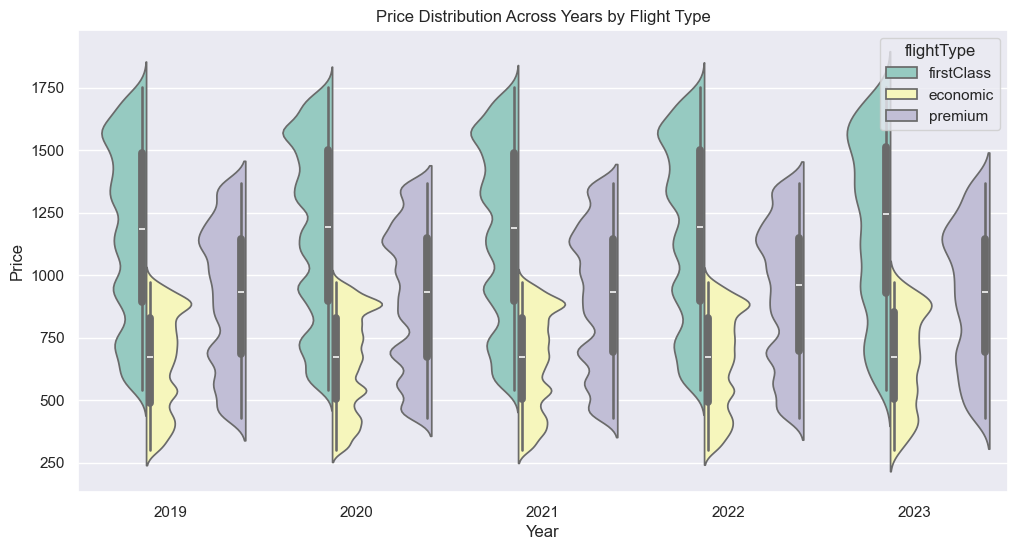

In [68]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=flights, 
    x='year', 
    y='price', 
    hue='flightType',
    split=True,
    palette='Set3'
)
plt.title('Price Distribution Across Years by Flight Type')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()


The violin plot provides the same insights that the price distribution changes are not very significant across years. Also the violin plot shows the price distribution very clearly for each of the flightType in each year.Here we can see the overlapping of the prices of each flightType. So there is certain price range that is being offered across all the flightTypes.However it is most probably because of distances differnces of the flights . Shorter flight distances tends to be cheaper for all flightTypes.

In [69]:
# creating distance_bin1 where below 25th percentile is one bin , between 25th and 50th percentile is second bin and between 50th and 75th percentile is 3rd bin and greater than 75th percentile is 4th bin

# Calculate percentiles
q25 = flights['distance'].quantile(0.25)
q50 = flights['distance'].quantile(0.50)
q75 = flights['distance'].quantile(0.75)

# Create bins
bins = [flights['distance'].min()-1, q25, q50, q75, flights['distance'].max()+1]

# Create labels
labels = ['0-25th percentile', 
          '25-50th percentile', 
          '50-75th percentile', 
          '75-100th percentile']

# Create the new binned column
flights['distance_bin1'] = pd.cut(flights['distance'], bins=bins, labels=labels)


In [70]:
flights['distance_bin1'].value_counts()


distance_bin1
25-50th percentile     70340
0-25th percentile      69406
75-100th percentile    66538
50-75th percentile     65604
Name: count, dtype: int64

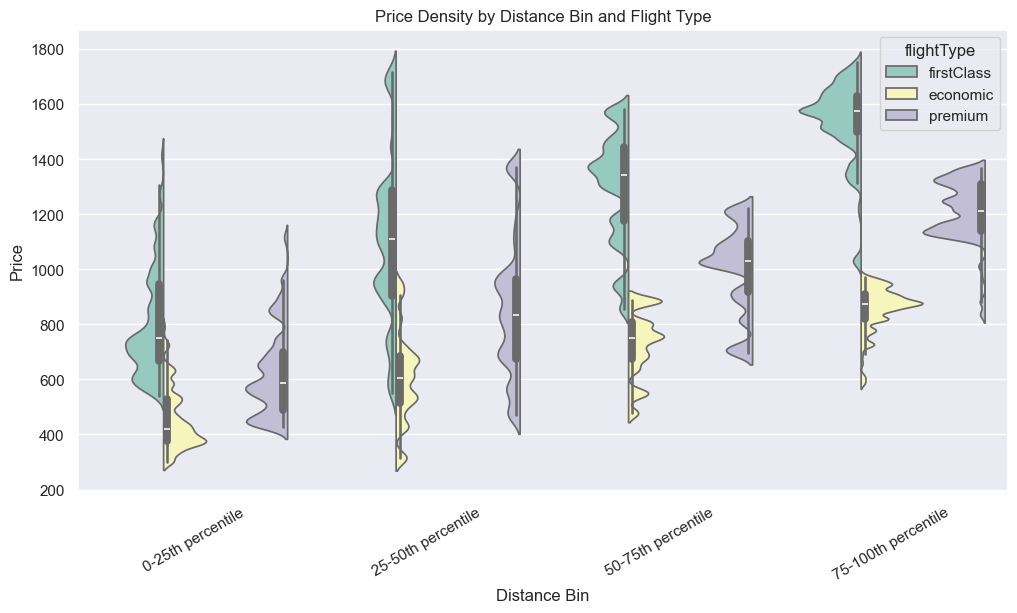

In [71]:
plt.figure(figsize=(12,6))
sns.violinplot(
    data=flights,
    x='distance_bin1',
    y='price',
    hue='flightType',
    split=True,
    palette='Set3'
)
plt.title('Price Density by Distance Bin and Flight Type')
plt.xlabel('Distance Bin')
plt.ylabel('Price')
plt.xticks(rotation=30)
plt.show()


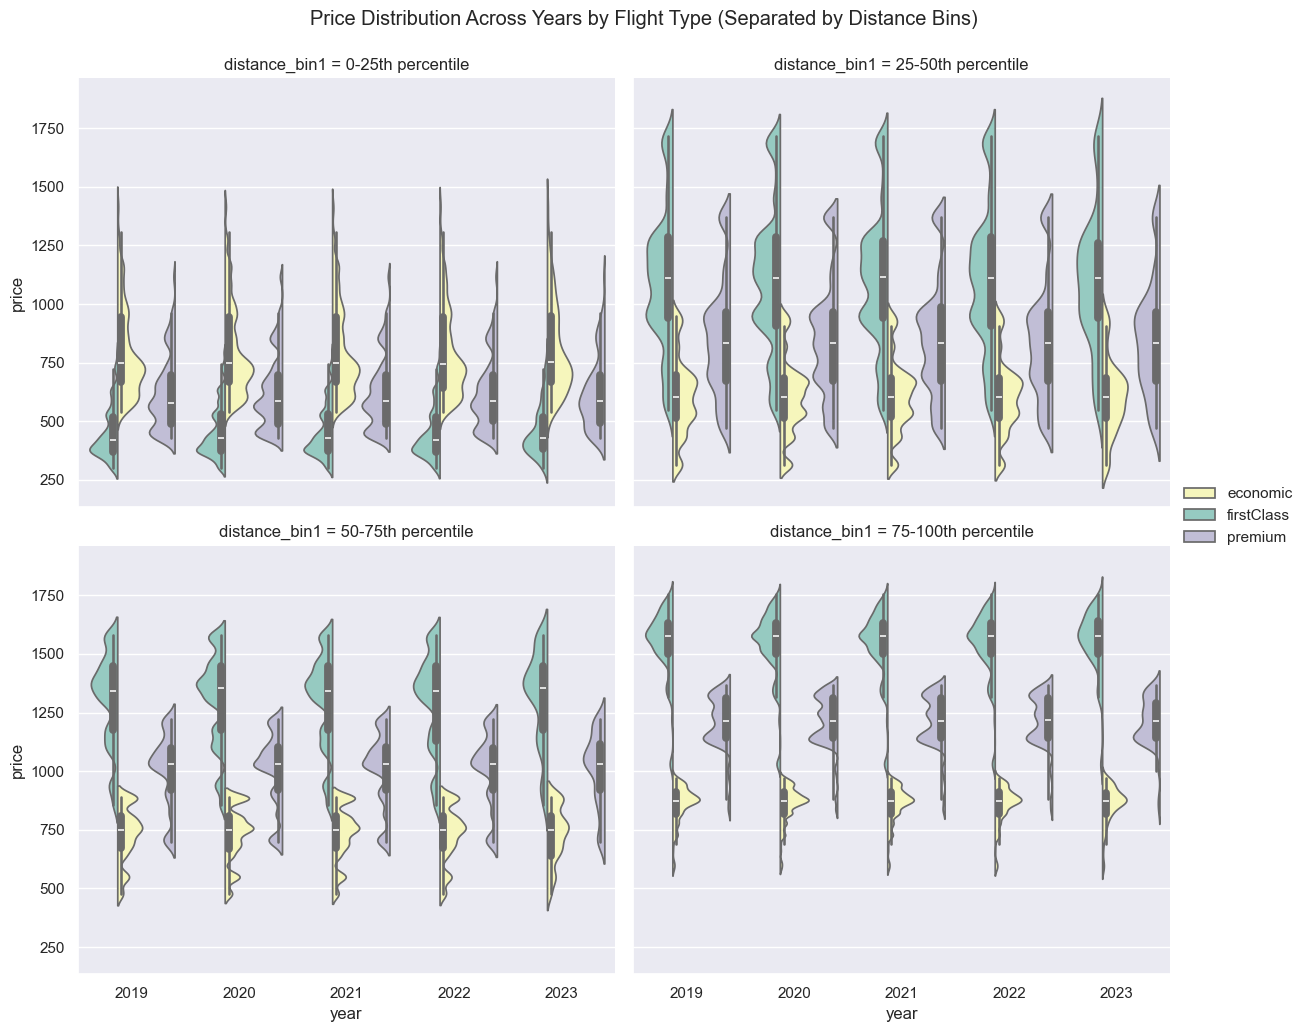

In [72]:
# separate violin plots for each distance bin, while keeping:
# x = year
# y = price
# hue = flightType

g = sns.FacetGrid(
    flights, 
    col='distance_bin1', 
    height=5, 
    aspect=1.2, 
    col_wrap=2
)

g.map_dataframe(
    sns.violinplot,
    x='year',
    y='price',
    hue='flightType',
    split=True,
    palette='Set3'
)

g.add_legend()
g.fig.suptitle("Price Distribution Across Years by Flight Type (Separated by Distance Bins)", y=1.03)
plt.show()


In [73]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin', 'year', 'month', 'day',
       'weekday', 'distance_bin1'],
      dtype='object')

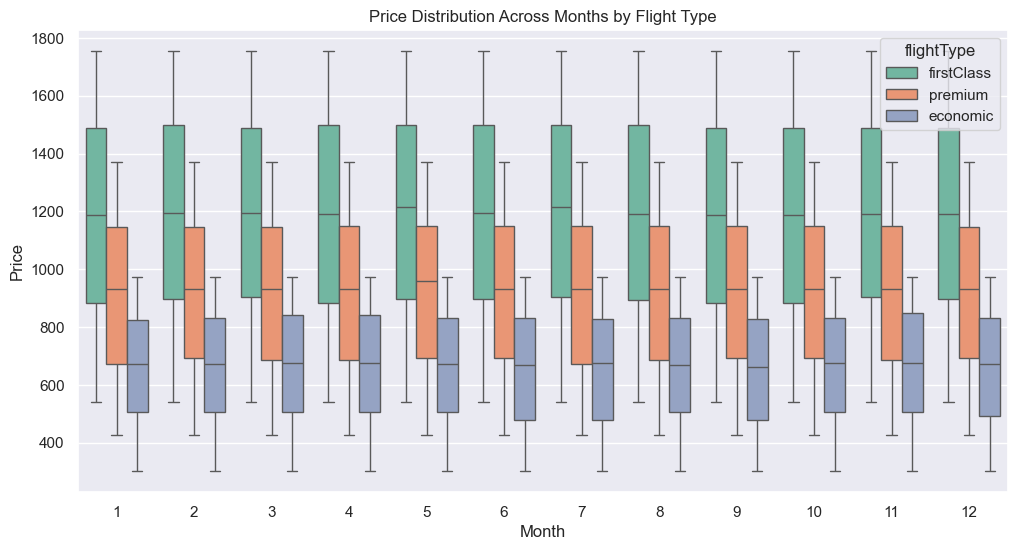

In [74]:
# Price Distribution Across Months by Flight Type
plt.figure(figsize=(12,6))
sns.boxplot(
    data=flights,
    x='month',
    y='price',
    hue='flightType',
    palette='Set2'
)
plt.title('Price Distribution Across Months by Flight Type')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()


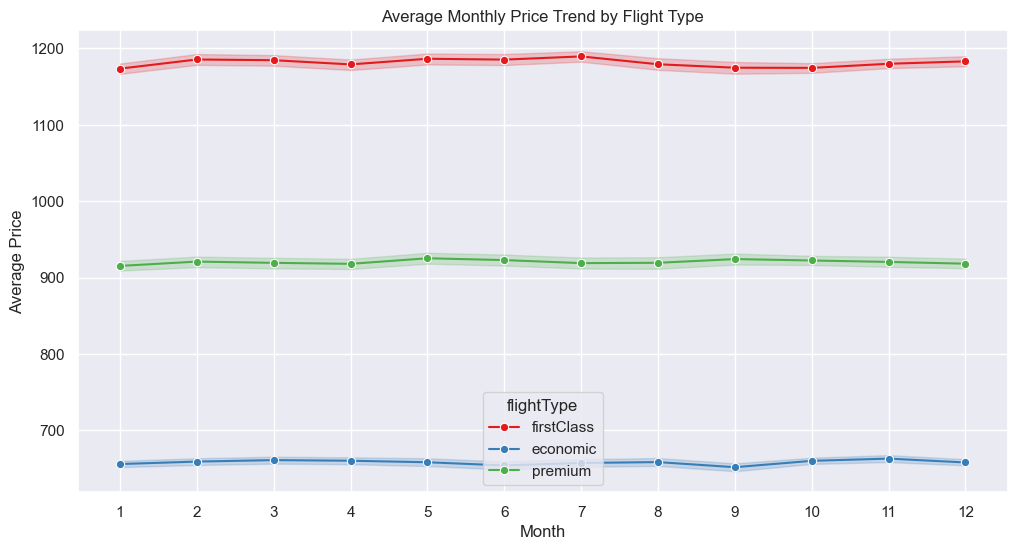

In [75]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=flights,
    x='month',
    y='price',
    hue='flightType',
    estimator='mean',
    marker='o',
    palette='Set1'
)
plt.title('Average Monthly Price Trend by Flight Type')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.xticks(range(1,13))
plt.show()


In [76]:
flights.columns

Index(['travelCode', 'userCode', 'from', 'to', 'flightType', 'price', 'time',
       'distance', 'agency', 'date', 'distance_bin', 'year', 'month', 'day',
       'weekday', 'distance_bin1'],
      dtype='object')

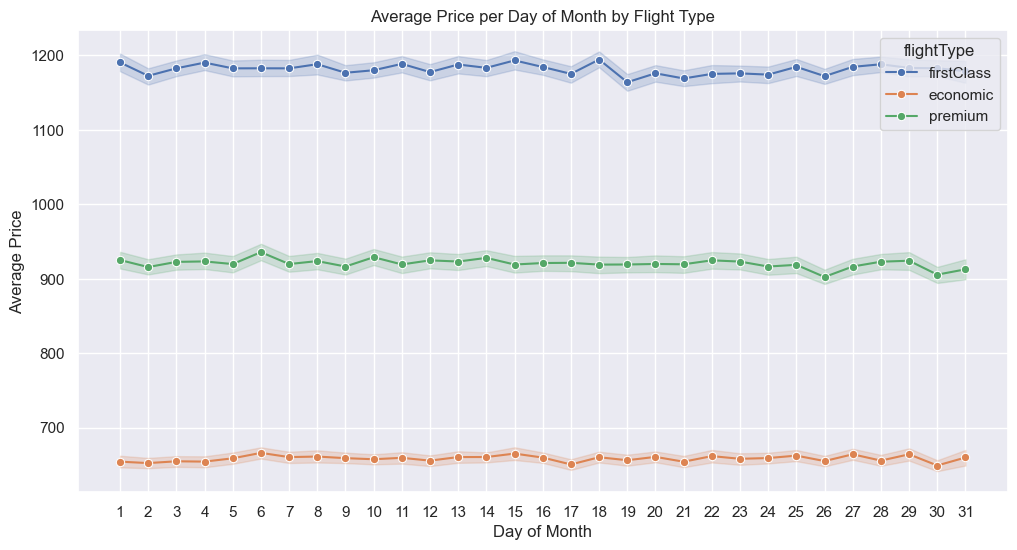

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(
    data=flights,
    x='day',
    y='price',
    hue='flightType',
    estimator='mean',
    marker='o'
)
plt.title('Average Price per Day of Month by Flight Type')
plt.xlabel('Day of Month')
plt.ylabel('Average Price')
plt.xticks(range(1, 32))
plt.show()


In [78]:
flights.head()

,travelCode,userCode,from,to,flightType,price,time,distance,agency,date,distance_bin,year,month,day,weekday,distance_bin1
0,0,0,Recife (PE),Florianopolis (SC),firstClass,1434.38,1.76,676.53,FlyingDrops,2019-09-26,500-900,2019,9,26,Thursday,50-75th percentile
1,0,0,Florianopolis (SC),Recife (PE),firstClass,1292.29,1.76,676.53,FlyingDrops,2019-09-30,500-900,2019,9,30,Monday,50-75th percentile
2,1,0,Brasilia (DF),Florianopolis (SC),firstClass,1487.52,1.66,637.56,CloudFy,2019-10-03,500-900,2019,10,3,Thursday,50-75th percentile
3,1,0,Florianopolis (SC),Brasilia (DF),firstClass,1127.36,1.66,637.56,CloudFy,2019-10-04,500-900,2019,10,4,Friday,50-75th percentile
4,2,0,Aracaju (SE),Salvador (BH),firstClass,1684.05,2.16,830.86,CloudFy,2019-10-10,500-900,2019,10,10,Thursday,75-100th percentile


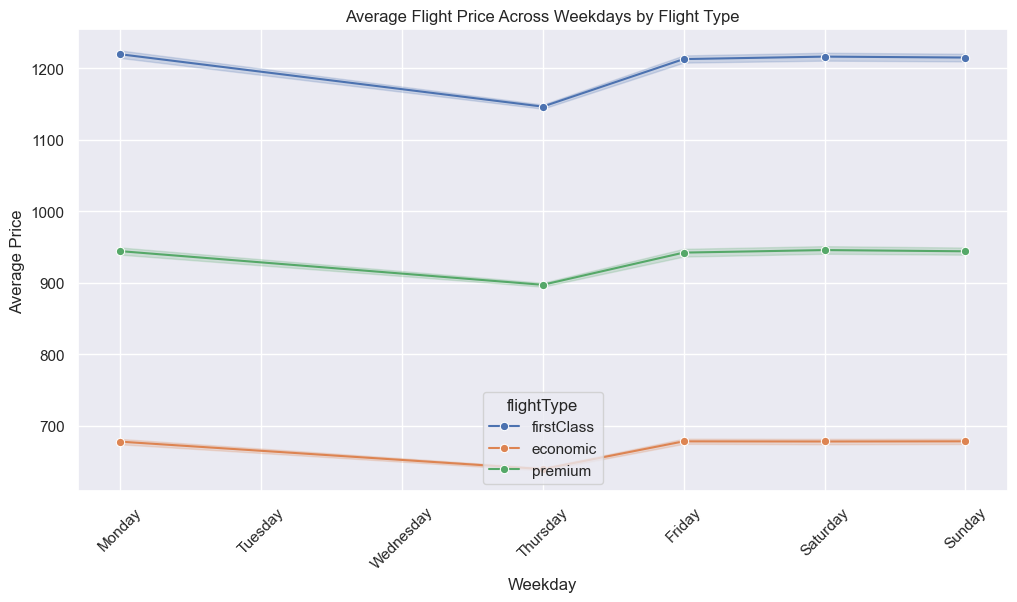

In [79]:
weekday_order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]

# Make weekday an ordered categorical column
flights['weekday'] = pd.Categorical(flights['weekday'], categories=weekday_order, ordered=True)

plt.figure(figsize=(12,6))
sns.lineplot(
    data=flights,
    x='weekday',
    y='price',
    hue='flightType',
    estimator='mean',
    marker='o'
)

plt.title('Average Flight Price Across Weekdays by Flight Type')
plt.xlabel('Weekday')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()



We can see the continuous dip in the prices of the flights across all flight types from monday to thursday . Thursday has the lowest flight prices across all flightType categories.Then again the prices surges from Friday and remain stable till sunday.